<font size=6><b> lec04. 머신러닝 :  편향(bias) vs 분산(variance) 트레이드오프

* https://www.youtube.com/watch?v=haJHSSX37kU  
* https://www.youtube.com/watch?v=7RtWlPpk348&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk


-----------------------------------------
언더피트(과소적합) : degree:1 고편향
-----------------------------------------
과소적합 , 고편향, 모델이 특징을 설명할 수 있을만큼 유연성이 충분하지 않음<br>
1차방적식 직선...

-----------------------------------------
오버피트(과대적합) : degree:10 고분산
-----------------------------------------
과대적합 , 고분산, 모델이 특징을 세밀하게 설명할수 있을만큼 유연성이 충분하지만 잡음까지 반영<br>
n차 방정식 곡선...
-----------------------------------------


## 선형 --> 비선형 모델 예 


### degree가 높아짐에따라 학습 데이터에 최적화되는 것처럼 보임 
* 모든 점을 지난다고 좋은 모델인가?
* 모델 복잡도가 높아지면 노이즈가 발행할 수 있어 성능에 대한 판단이 필요함

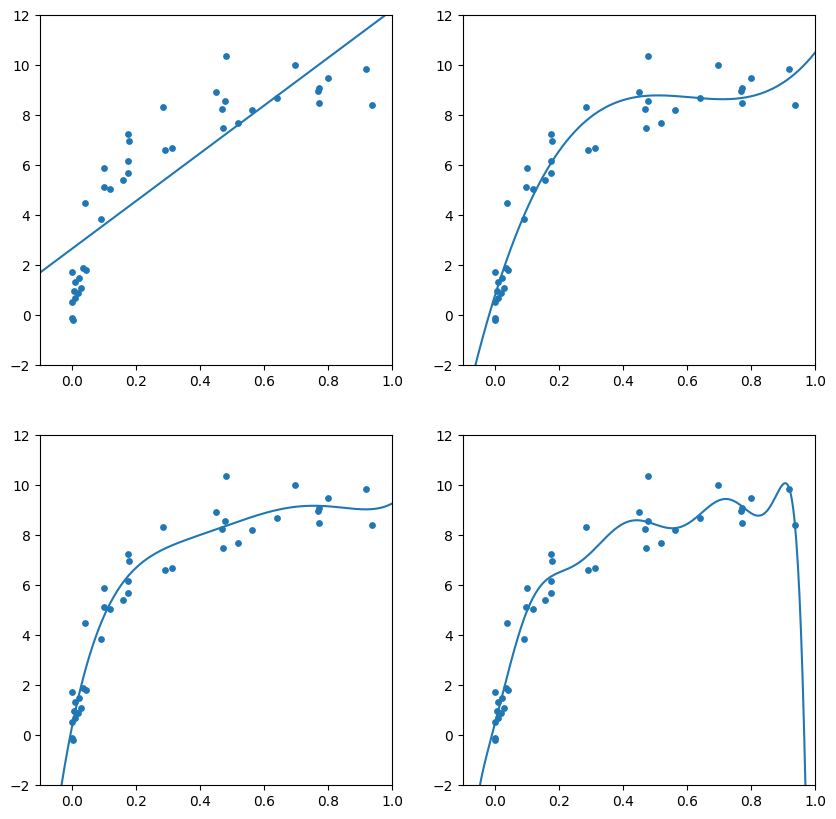

In [1]:
#여기코드 너무 자세히는 보지 않아도 됨ㄴ
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures	#차수 : 모델 복잡도를 조절하기위한 코드 수행
from sklearn.linear_model import LinearRegression 		#선형모델
from sklearn.pipeline import make_pipeline				#전처리+모델작업 --> 객체들이 심리스하게 수행되어 생산성높음
np.random.seed(1)
X = np.random.rand(40,1) **2  #40행1열
y = (10-1. / (X.ravel() + 0.1)) + np.random.randn(40)	#임의값 + 오차항관련데이터

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1) 	    #2차원배열 : -0.1~1.1 500개

fig = plt.figure(figsize=(10,10))
for i, degree in enumerate([1,3,5,10], start=1):
	ax = fig.add_subplot(2,2,i)
	ax.scatter(X.ravel(), y, s=15)
                            #피쳐엔지니어링(차수조정)						#데이터접합		#예측
	y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X,y).predict(X_test)
	ax.plot(X_test.ravel(), y_test, label=f'{degree}')
	ax.set_xlim(-0.1, 1.0)
	ax.set_ylim(-2, 12)

* 1차트 : 언더피트 고편향
* 4차트 : 오버피트 고분산

# 규제

* 규제란 오버피팅(고분산모델:차수 높으면 구불구불)된 파라미터 값에 대해 페널피 부여
* <font color=red><b>고분산모델(피팅,모델복잡도높음) 대해 규제하면 오버피팅 감소</b></font>
* <font color=red>페널티를 가한다는 것은 편향을 높인다는 것</font>을 의미하며, 규제가 없는 모델보다 훈련 데이터 적합도가 떨어지지만 전체적 결과는 좋아짐
* 페널티 추가되면 규제가 없는 회귀모델보다 계수의 절대값이 작아지게 되는 원리 이용해 오버피팅 방지
* 오버피팅된 모델은 지나친 노이즈를 반영할 수 있으므로 모델을 단순화하여 좀 더 일반화된 모델로 만들 필요가 있음

https://www.youtube.com/playlist?list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk